In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

from KETIPrePartialDataPreprocessing import main

inputType ='influx' # or file
refine_param = {'removeDuplication':True, 'staticFrequency':True}
outlier_param= {'certainOutlierToNaN':True, 'uncertainOutlierToNaN':True, 'data_type':'air'}   
#imputation_param ={ "imputation_method":[{"min":0,"max":1,"method":"linear"}, {"min":2,"max":3,"method":"time"}],"totalNanLimit":70}
imputation_param ={ "imputation_method":[{"min":0,"max":50,"method":"linear"}],"totalNanLimit":70}

# ffill~polynomial_interpolate=> 각 구간마다 딱 고만큼만 Fill

input_data = main.inputControl(inputType)
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)

['traffic_seoul_subway', 'traffic_seoul_bus', 'test', 'energy_electronic_power', 'test_bio_covid', 'test_indoor_high', 'air_indoor_중학교', 'traffic_seoul_bike', 'traffic_public_parking', 'energy_electricity_transaction', 'energy_fire_power', 'traffic_expressway', 'farm_inner_air', 'farm_outdoor_weather', 'farm_outdoor_weather_clean', 'farm_outdoor_air', 'farm_outdoor_air_clean', 'air_outdoor_에어코리아', 'energy_water_discharge', 'energy_wind_power', 'city_exhibition_entrance_status', 'bio_covid_vaccinations', 'air_indoor_유치원', 'air_indoor_요양원', 'air_indoor_아파트', 'air_indoor_도서관', 'air_indoor_경로당', 'air_indoor_초등학교', 'air_indoor_체육시설', 'air_indoor_어린이집', 'air_indoor_고등학교', 'air_outdoor', 'bio_covid_infected_world', 'bio_covid_infected_korea', '_internal', 'bio_test_infected']
['ICL1L2000234', 'ICL1L2000235', 'ICL1L2000236', 'ICL1L2000237', 'ICL1L2000238', 'ICL1L2000239', 'ICL1L2000240', 'ICL1L2000241', 'ICL1L2000242', 'ICL1L2000243', 'ICL1L2000244', 'ICL1L2000245', 'ICL1L2000246', 'ICL1L20002

In [18]:
from KETIPrePartialDataPreprocessing import data_preprocessing
column_name = input_test_data.columns[7]
output = data_preprocessing.ByAllMethod(input_test_data[[column_name]][:20000], refine_param, outlier_param, imputation_param)

NaN Ratio: in_cici_temp 17.32 %
linear


key:  original Data Leangth: 20000 Data NaN Length: in_cici_temp    0
dtype: int64


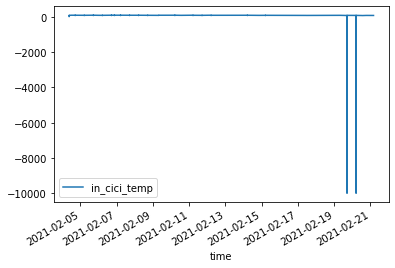

key:  refined_data Data Leangth: 24187 Data NaN Length: in_cici_temp    4187
dtype: int64


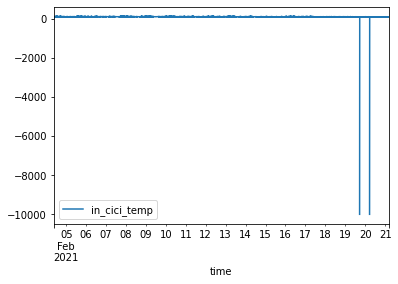

key:  datawithMoreCertainNaN Data Leangth: 24187 Data NaN Length: in_cici_temp    4189
dtype: int64


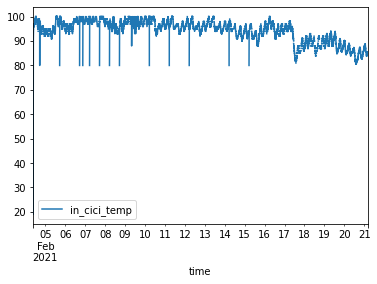

key:  datawithMoreUnCertainNaN Data Leangth: 24187 Data NaN Length: in_cici_temp    4189
dtype: int64


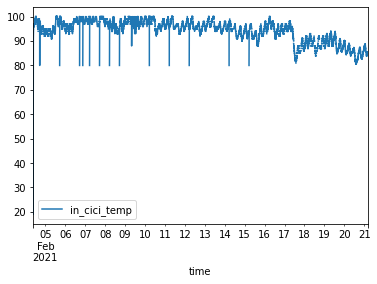

key:  imputed_data Data Leangth: 24187 Data NaN Length: in_cici_temp    0
dtype: int64


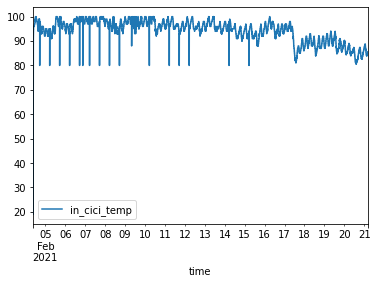

In [19]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    temp.plot()
    plt.show()